
[[0.         0.49998504 0.         ... 0.         0.         0.        ]
 [0.49997023 0.         0.49997023 ... 0.         0.         0.        ]
 [0.         0.49995571 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.5000443  0.        ]
 [0.         0.         0.         ... 0.50002977 0.         0.50002977]
 [0.         0.         0.         ... 0.         0.50001496 0.        ]]


(array([-9.98814945e-01, -9.95176827e-01, -9.89175321e-01, -9.80784663e-01,
       -9.70030877e-01, -9.56940086e-01, -9.41543890e-01, -9.23879405e-01,
       -9.03989197e-01, -8.81921191e-01, -8.57728554e-01, -8.31469568e-01,
       -8.03207497e-01, -7.73010426e-01, -7.40951104e-01, -7.07106765e-01,
       -6.71558942e-01, -6.34393274e-01, -5.95699297e-01, -5.55570227e-01,
       -5.14102740e-01, -4.71396734e-01, -4.27555091e-01, -3.82683431e-01,
       -3.36889852e-01, -2.90284677e-01, -2.42980180e-01, -1.95090322e-01,
       -1.46730474e-01, -9.

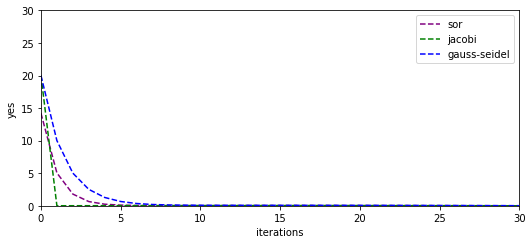

In [22]:
import numpy as np 
import sys
import matplotlib.pyplot as plt
import scipy 

# sor
def sor(A, b, xn, w):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]

        xnp1[j] = w*(b[j] - sum)/A[j, j] + (1-w)*xn[j]
    return xnp1

# Jacobi
def jacobi(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k != j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1

# Gauss Seidel
def gsMethod(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1

# defining function for A matrix diagonal elements (u_j coefficients)
# j is iteration, e is epsilon value
# checked this with wolfram and got matching values
def epsA(j, e):
    c = (-2.0 - (((50.0/64.0)**2.0)*(0.01)*e*np.sin((np.pi*j)/32.0)))
    return c

# defining function for b matrix long equation
# j is iteration, e is epsilon value
# checked this with wolfram and got matching values
def epsb(j, e):
    return (-(50.0/64.0)**2.0)*0.01*(1+e*np.sin((j*np.pi)/32.0)*100.0)

# create 63x63 matrix
A = np.zeros((63,63))
Adiag = np.zeros((63,63))

# create and fill 63 column array
d = np.arange(62.0)
d.fill(1.0)


#create new arrays with upper and lower diagonals of 1
x1 = np.diag(d, 1)
x2 = np.diag(d, -1)

# add x1 + x2 to get 1s on on upper/lower diagonal
A = x1 + x2 

# assign epsA function to diagonal 
for j in range(0,63):
    A[j][j] = epsA(j+1, 0.1)
    Adiag[j][j] = epsA(j+1, 0.1)

AdiagInv = np.linalg.inv(Adiag)

#print(A)
#print()

# create 63x1 b matrix
b = np.zeros((63,1))

# add epsb values to b with a chosen epsilon for now
for i in range(0, 63):
    b[i] = epsb(i+1, 0.1)

# substract off constants u0 and uL
b[0] = b[0] - 40
b[62] = b[62] - 110 

# b matrix should be correct 
#print(b)
#print()

lu = (-x1) + (-x2)

Rj = np.matmul(AdiagInv,lu)

xn = np.zeros((63,1))

print()
print(Rj)
print()
print()
print(np.linalg.eigh(Rj))

y1 = jacobi(A,b,xn)
y2 = gsMethod(A,b,xn)
y3 = sor(A,b,xn,0.71)


# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#create x values
x1 = np.linspace(0,62,63)
x2 = x1
x3 = x1

#print(y1)
#print()
#print(y3)

# plot functions
plt.plot(x3, y3, '--', color = "purple", label = 'sor')
plt.plot(x1, y1, '--', color = "green",label = 'jacobi')
plt.plot(x2, y2, '--',  color = "blue",label = 'gauss-seidel')
plt.legend()

#label axis
plt.xlabel("iterations")
plt.ylabel("yes")

# constrain graph window 
plt.xlim([0, 30])
plt.ylim([0, 30])

# display graph
plt.show()

